In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import copy
import cPickle
from Rat import Rat

from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
ratFile = open("allRatData.pkl","rb")
allRatData = cPickle.load(ratFile)
ratFile.close()

In [2]:
ratFile = open("allRatData.pkl","rb")
allRatData = cPickle.load(ratFile)
ratFile.close()

In [3]:
rats = preProcess(allRatData,ratnames = [])

/gpfsnyu/packages/lpython/2.7/intelpython2/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:703: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [4]:
block_lengths = {}
for ratname, rat in rats.iteritems():
    count=0
    block_length = []
    for i in range(rat.trials["block"].shape[0]):
        if rat.trials["block"][i]:
            count+=1
        else:
            block_length.append(count)
            count = 0
    block_length = np.array(block_length)
    block_lengths[ratname] = block_length

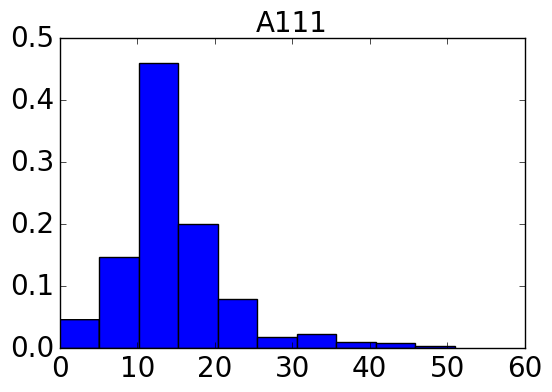

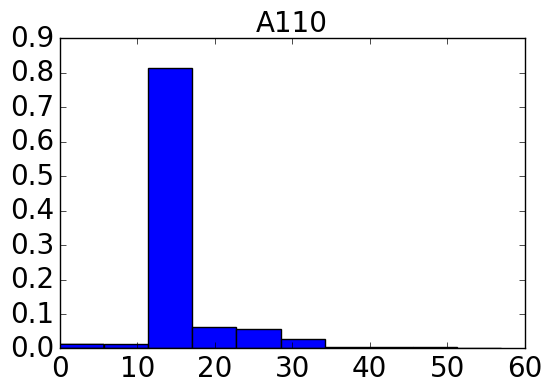

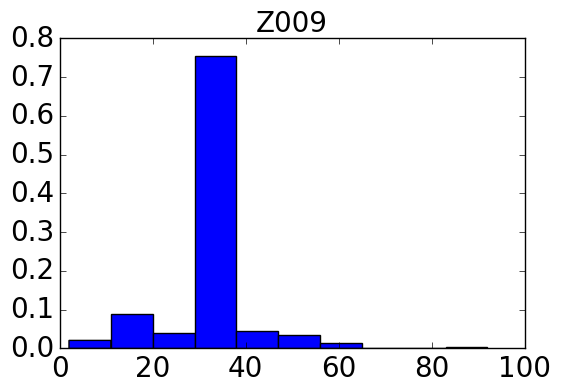

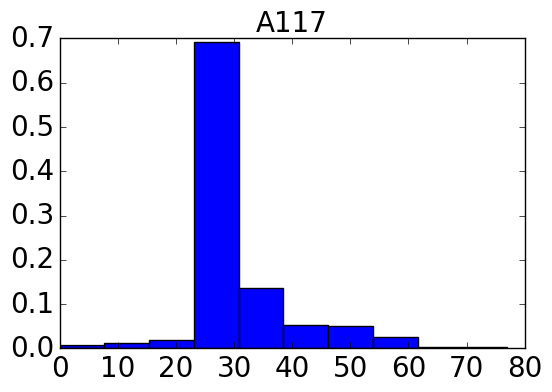

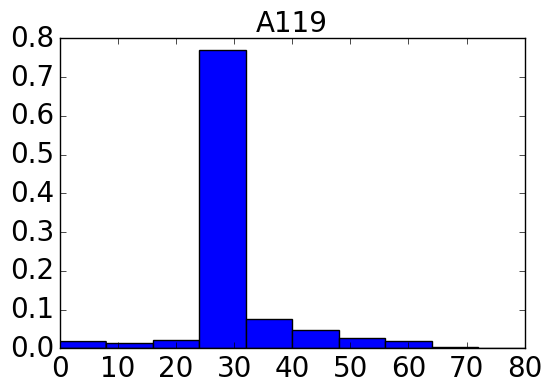

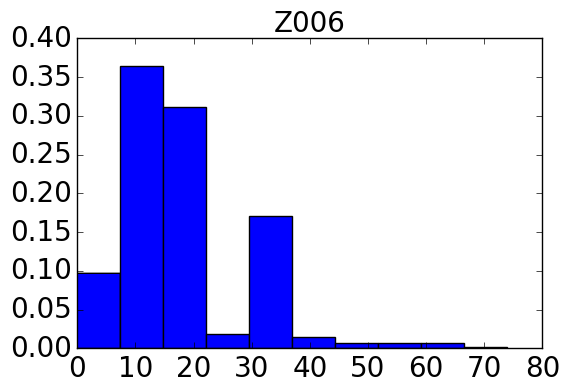

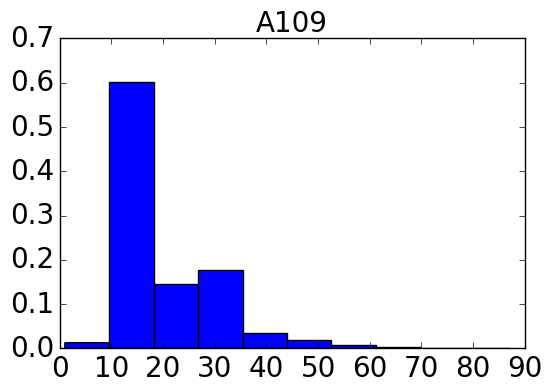

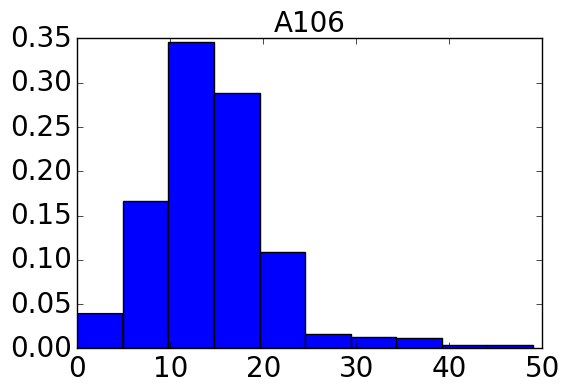

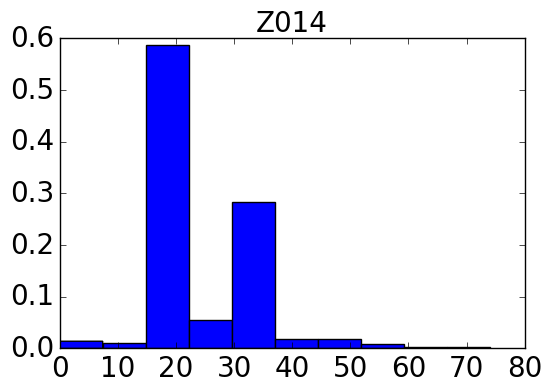

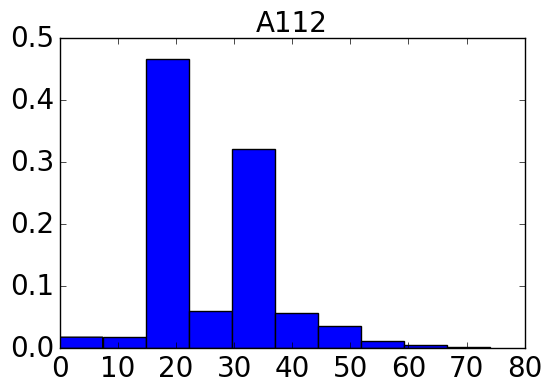

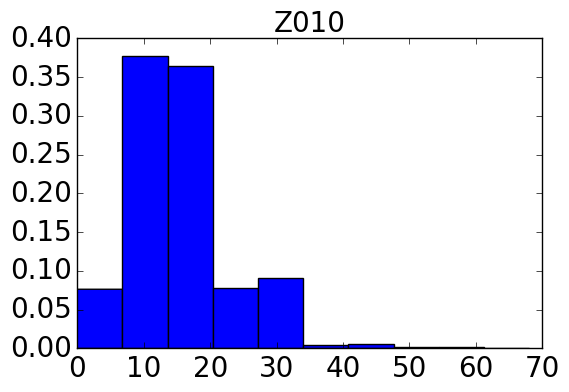

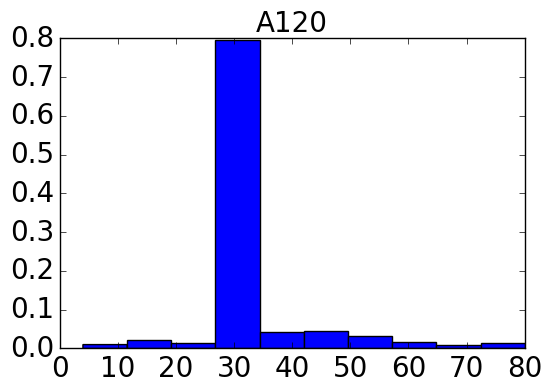

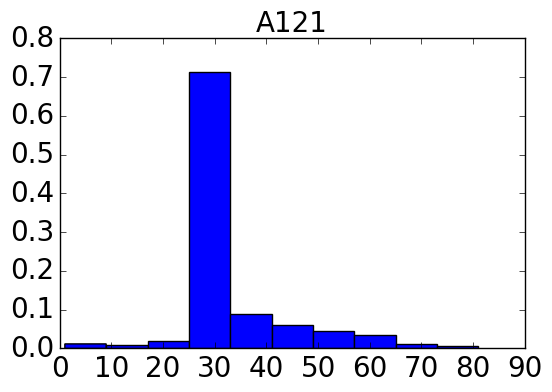

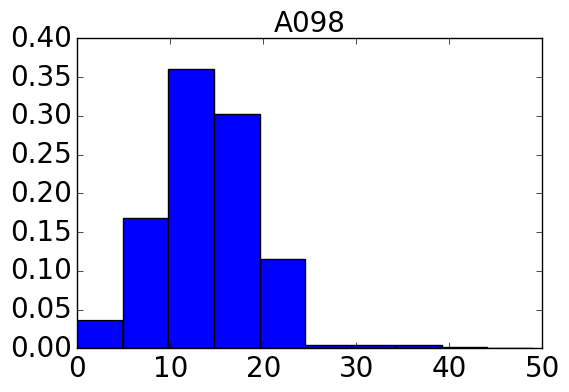

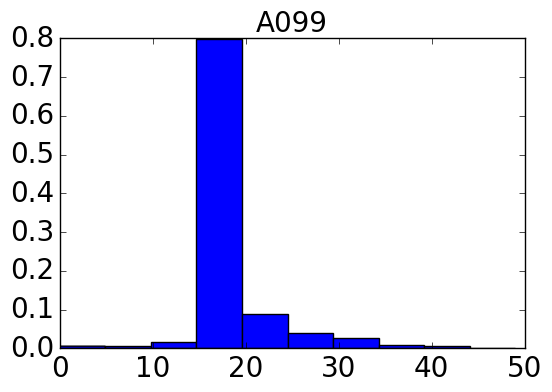

In [5]:
for ratname, block in block_lengths.iteritems():
    plt.figure()
    plt.hist(block,bins = 10, weights=np.zeros_like(block) + 1. / block.size)
    plt.title(ratname)
    plt.show()

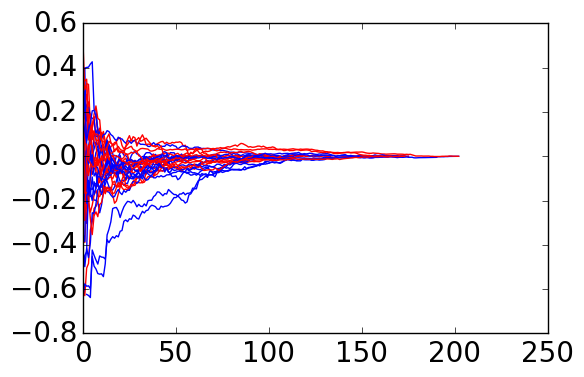

In [6]:
plt.figure()
for ratname, rat in rats.iteritems():  
    plt.plot(rat.pro_switch_cost - rat.pro_switch_cost[-1], color = "blue")
    plt.plot(rat.anti_switch_cost - rat.anti_switch_cost[-1], color = "red")
plt.show()

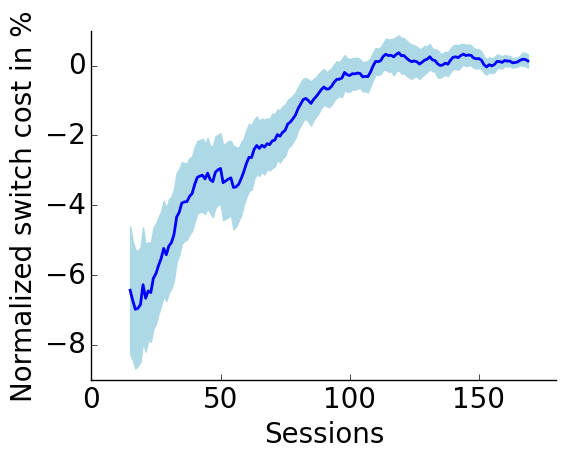

In [10]:
switch_cost_vs_time(rats, filename="realRatSwitchCostvsTime.pdf")

A111
A110
Z009
A117
A119
Z006
A109
A106
Z014
A112
Z010
A120
A121
A098
A099


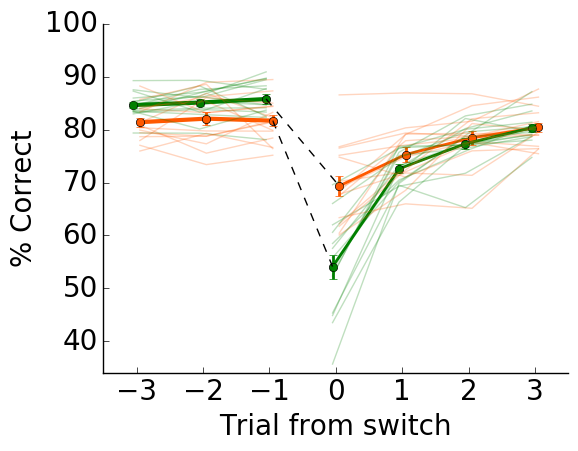

In [9]:
p2a, a2p = figure_3d_matrix(rats = rats, trial_window = 3)
draw_3d(p2a_matrix = p2a, a2p_matrix = a2p, fixed_size = False, trial_window = 3, filename="realRat3D.pdf")